# TOPIC: Unveiling Lateness with Causal discovery on the industry of train transport.

## Abstract: 
#### Train delays have caused frustration and economic losses. While there are plenty of factors that contribute to delays, finding and pinpointing their causal relationships still remains a bit of a challenge. This thesis proposes different investigations by using causal discovery algorithms to come up with a causal diagram explaining these plagues of train punctuality.
#
#### By using different data sets that includes, train journeys, dates, and minutes late, we aim to construct an image describing potential delay causes. These will be discovered using Causal discovery with TIGRAMITE

In [1]:
import tigramite
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite import data_processing as pp
from tigramite.independence_tests.parcorr import ParCorr

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dataset = pd.read_csv('dataset_Train.csv')

In [3]:
train_journeys = dataset.groupby('train')['journeys'].sum()
train_10_journeys = train_journeys.groupby(level=0).head(10)
top_5_trains = train_journeys.nlargest(5)

Index(['80000000', '80056374', '80112318', '80135624', '80011346'], dtype='object', name='train')
[388438 128589 121849 102521  96091]


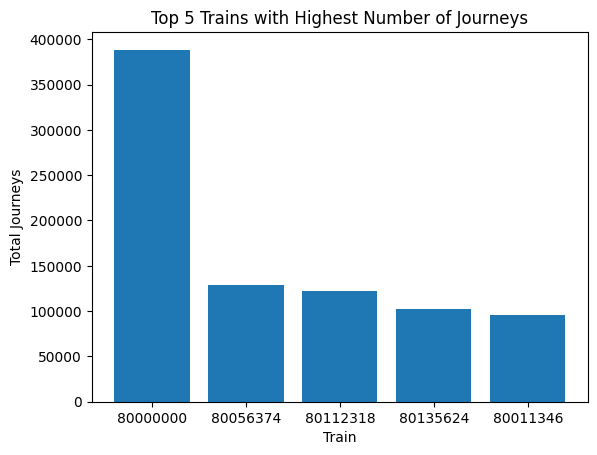

In [4]:
top_5_trains.index = top_5_trains.index.astype(str)
plt.bar(top_5_trains.index, top_5_trains.values)
print(top_5_trains.index)
print(top_5_trains.values)
plt.xlabel('Train')
plt.ylabel('Total Journeys')
plt.title('Top 5 Trains with Highest Number of Journeys')
plt.show()

In [19]:
features = ["train", "date", "journeys", "late"]
data = dataset
data = data[features]
data = data[data['train'] == 80000000]
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y %H:%M')
data = data.drop(['train'], axis=1)
data['journeys'] = data['journeys'].astype(np.float64)
data['late'] = data['late'].astype(np.float64)

In [20]:
# making causal discovery
tigramite_data = pp.DataFrame(data[['journeys', 'late']].to_numpy())
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(tigramite_data, cond_ind_test=parcorr)
results = pcmci.run_pcmci(tau_max=3)

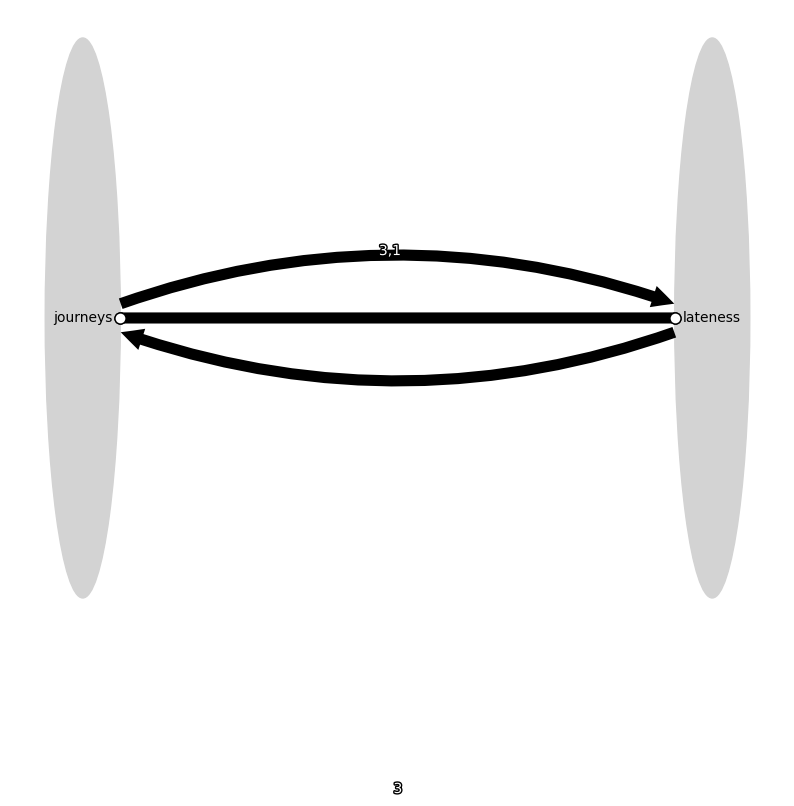

In [21]:
graph = tp.plot_graph(
    results['graph'],
    var_names=['lateness', 'journeys'],
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False,
    figsize=(10, 8),
)

### Interpretation?

#### Mine: any 